In [122]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set

In [123]:
# Importing all datasets
leads_data_original = pd.read_csv("Leads.csv")
leads_data_original.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Preparation & EDA

### Data Preparation - I

In [124]:
leads_data_original.shape

(9240, 37)

In [125]:
# Checking the percentage of missing values
round(100*(leads_data_original.isnull().sum()/len(leads_data_original.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- As we see above, we have a lot of missing values in many columns. Imputing values for such a high number of nulls would lead to biased results. 
- So, lets drop the columns that have >30% missing values

In [126]:
leads_df_cleaned = leads_data_original.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
round(100*(leads_df_cleaned.isnull().sum()/len(leads_df_cleaned.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Lets analyse the null above in a little more detail and see if there are more potential variables that need to be dropped

In [127]:
leads_df_cleaned.shape

(9240, 31)

In [128]:
print('Total nulls',leads_df_cleaned.City.isnull().sum() )  #1420 Select - 2249
leads_df_cleaned.City.value_counts()

Total nulls 1420


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

  - Out of 9240 total records, 1420 values are null and 2249 value the value Select which means this value was not entered. So in total we have (2249 + 1420)/9240 = ~40 % nulls. So we can drop this column

In [129]:
print('Total nulls',leads_df_cleaned['Lead Profile'].isnull().sum() )  #1420 Select - 2249
leads_df_cleaned['Lead Profile'].value_counts()

Total nulls 2709


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

  - Out of 9240 total records, 2709 values are null and 4146 value the value Select which means this value was not entered. So in total we have (2709 + 4146)/9240 = ~74% nulls. So we can drop this column

In [130]:
print('Total nulls',leads_df_cleaned['Specialization'].isnull().sum() )  #1420 Select - 2249
leads_df_cleaned['Specialization'].value_counts()

Total nulls 1438


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- Out of 9240 total records, 1438 values are null and 1942 value the value Select which means this value was not entered. So in total we have (1438 + 1942)/9240 = ~36% nulls. So we can drop this column

In [131]:
print('Total nulls',leads_df_cleaned['How did you hear about X Education'].isnull().sum() )  #1420 Select - 2249
leads_df_cleaned['How did you hear about X Education'].value_counts()

Total nulls 2207


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

- Out of 9240 total records, 2207 values are null and 5043 value the value Select which means this value was not entered. So in total we have (2207 + 5043)/9240 = ~78% nulls. So we can drop this column

In [132]:
leads_df_cleaned.drop(['Lead Profile','City','Specialization','How did you hear about X Education'],axis=1,inplace=True)

- Lead Source, TotalVisits, Page Views Per Visit and Last Activity have a very small number of nulls. Lets impute these with the mean/most frequent value for this column

In [133]:
leads_df_cleaned.loc[np.isnan(leads_df_cleaned.TotalVisits),'TotalVisits'] = np.round(np.mean(leads_df_cleaned.TotalVisits))

In [134]:
leads_df_cleaned.loc[np.isnan(leads_df_cleaned['Page Views Per Visit']),'Page Views Per Visit'] = np.round(np.mean(leads_df_cleaned['Page Views Per Visit']),decimals=0)

In [135]:
leads_df_cleaned['Lead Source'].value_counts()  #Google
leads_df_cleaned.loc[leads_df_cleaned['Lead Source'].isnull(),'Lead Source'] = 'Google'

In [136]:
leads_df_cleaned['Last Activity'].value_counts()  #Email Opened
leads_df_cleaned.loc[leads_df_cleaned['Last Activity'].isnull(),'Last Activity'] = 'Email Opened'

In [137]:
leads_df_cleaned.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Netherlands                2
Ghana                      2
China                      2
Philippines                2
Sri Lanka                  1
Malaysia                   1
Liberia                    1
Tanzania                   1
Russia                     1
Switzerland                1
Kenya         

- The Country variable has 26.63% values as null and out of the remaining, maximum values are India. So this variable does not add any variance to our data and hence can be dropped

In [138]:
leads_df_cleaned['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- This variable has 29.32% values as null and almost all records have the same value except 3. So this also does not contribute to any variation in our data. So we can drop this variable too.

In [139]:
leads_df_cleaned['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- This variable has 29.11% values as null and majority of the records have the same value. So this also does not contribute to much variation in our data. So we can drop this variable too.

In [140]:
leads_df_cleaned.drop(['What matters most to you in choosing a course','What is your current occupation','Country'],axis=1,inplace=True)

In [141]:
round(100*(leads_df_cleaned.isnull().sum()/len(leads_df_cleaned.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

- So now we have the dataset with 0 null values and we can move forward with this for model building

In [142]:
#Before moving on, Lets check the unique value counts for few more variables
print('Unique Update me on Supply Chain Content: ',len(leads_df_cleaned['Update me on Supply Chain Content'].value_counts())) #All No
print('Unique Receive More Updates About Our Courses: ',len(leads_df_cleaned['Receive More Updates About Our Courses'].value_counts())) #All No
print('Unique Get updates on DM Content: ',len(leads_df_cleaned['Get updates on DM Content'].value_counts())) #All No
print('Unique I agree to pay the amount through cheque: ',len(leads_df_cleaned['I agree to pay the amount through cheque'].value_counts())) #All No
print('Unique Magazine: ',len(leads_df_cleaned['Magazine'].value_counts())) #All No

#leads_data_original['Get updates on DM Content'].value_counts() #All No
#leads_data_original['I agree to pay the amount through cheque'].value_counts() #All No


Unique Update me on Supply Chain Content:  1
Unique Receive More Updates About Our Courses:  1
Unique Get updates on DM Content:  1
Unique I agree to pay the amount through cheque:  1
Unique Magazine:  1


- So we have only one value for above variables in our data set. This does not affect the Coversion of a Leard as there is no variance. Hence we can drop these variables too

In [143]:
leads_df_cleaned.drop(['Update me on Supply Chain Content','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque','Magazine'],axis=1, inplace=True)

#### Checking for Outliers

In [144]:
# Checking for outliers in the continuous variables
check_outliers = leads_df_cleaned[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [145]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99% fro continuous variables
check_outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


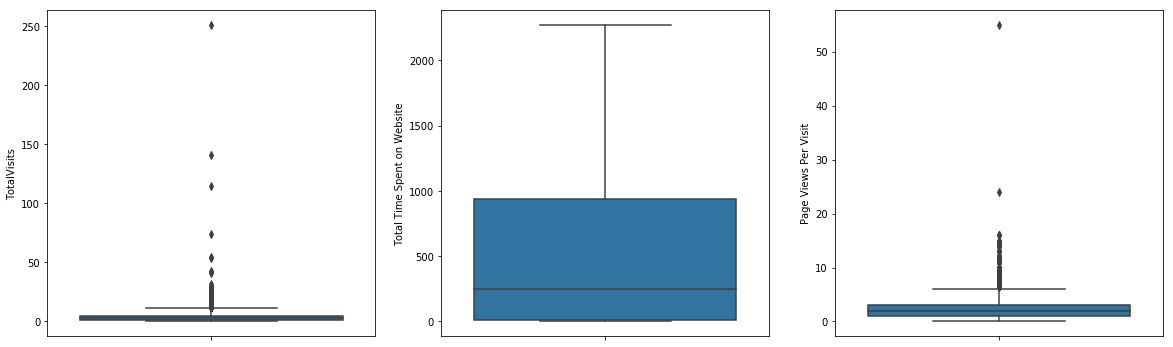

In [146]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(y=leads_df_cleaned.TotalVisits,data=leads_df_cleaned)

plt.subplot(1,3,2)
sns.boxplot(y=leads_df_cleaned['Total Time Spent on Website'],data=leads_df_cleaned)

plt.subplot(1,3,3)
sns.boxplot(y=leads_df_cleaned['Page Views Per Visit'], data=leads_df_cleaned)

plt .show()

So as we see, we have the presence of outliers in our data and this needs to be treated appropriately before moving ahead.

In [147]:
Q1 = leads_df_cleaned.TotalVisits.quantile(0.05)
Q3 = leads_df_cleaned.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads_df_cleaned_2 = leads_df_cleaned.loc[(leads_df_cleaned.TotalVisits>= Q1) & (leads_df_cleaned.TotalVisits<= Q3)]


Q1 = leads_df_cleaned['Total Time Spent on Website'].quantile(0.05)
Q3 = leads_df_cleaned['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
leads_df_cleaned_2 = leads_df_cleaned_2.loc[(leads_df_cleaned_2['Total Time Spent on Website']>= Q1) & (leads_df_cleaned_2['Total Time Spent on Website']<= Q3)]


Q1 = leads_df_cleaned['Page Views Per Visit'].quantile(0.05)
Q3 = leads_df_cleaned['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_df_cleaned_2 = leads_df_cleaned_2.loc[(leads_df_cleaned_2['Page Views Per Visit']>= Q1) & (leads_df_cleaned_2['Page Views Per Visit']<= Q3)]
#leads_df_cleaned_test.shape
#max_range
leads_df_cleaned_2.shape

(8201, 19)

In [148]:
len(leads_df_cleaned_2)/len(leads_data_original)*100

88.75541125541126

- So 88% data is still left for us to build the model

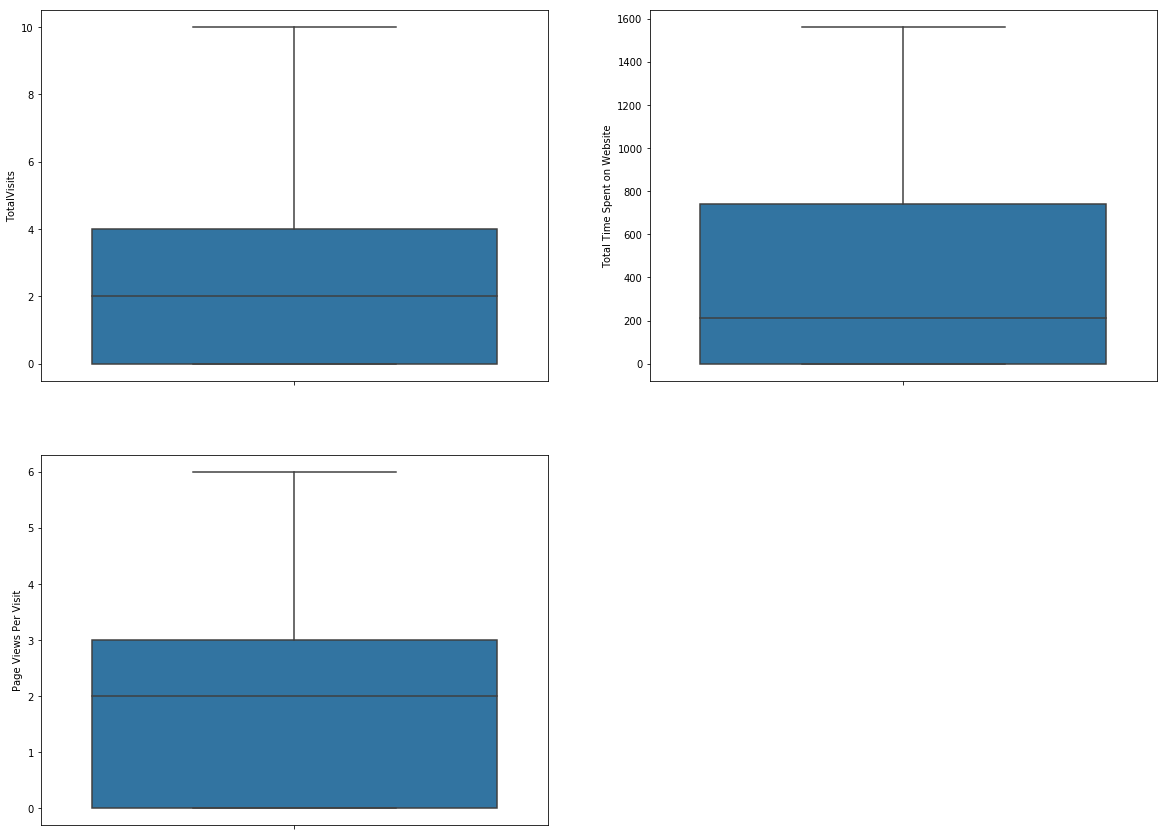

In [149]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(y=leads_df_cleaned_2.TotalVisits,data=leads_df_cleaned)

plt.subplot(2,2,2)
sns.boxplot(y=leads_df_cleaned_2['Total Time Spent on Website'],data=leads_df_cleaned)

plt.subplot(2,2,3)
sns.boxplot(y=leads_df_cleaned_2['Page Views Per Visit'], data=leads_df_cleaned)

plt .show()

- So now our data has no outliers

- Thogh we did see presence of some outliers but we would not drop those as a person may visit the site multiple times and hence the numbers may fluctuate. So we are NOT dropping the outliers.

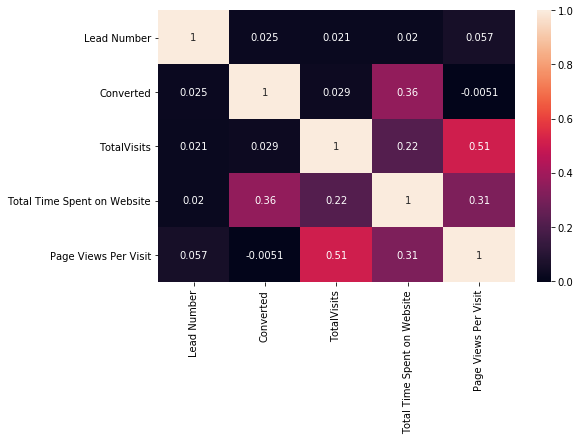

In [150]:
plt.figure(figsize=(8,5))
sns.heatmap(leads_df_cleaned.corr(),annot=True)

- The correlation coefficients do not appear to be too high. So we need not drop these variables and can go ahead with these further.

## Data Preparation - II

### Conversion of Values to Numeric form

In [151]:
leads_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


- As seen above, a number of variables have values as Yes No, we can map these to 0 and 1 and convert these fields as numeric

In [152]:
# Converting Yes to 1 and No to 0
leads_df_cleaned['Do Not Email'] = leads_df_cleaned['Do Not Email'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Newspaper Article'] = leads_df_cleaned['Newspaper Article'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Do Not Call'] = leads_df_cleaned['Do Not Call'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Search'] = leads_df_cleaned['Search'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['X Education Forums'] = leads_df_cleaned['X Education Forums'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Newspaper'] = leads_df_cleaned['Newspaper'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Digital Advertisement'] = leads_df_cleaned['Digital Advertisement'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['Through Recommendations'] = leads_df_cleaned['Through Recommendations'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned['A free copy of Mastering The Interview'] = leads_df_cleaned['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0}).astype(int)
leads_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified


In [153]:
leads_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int32
Do Not Call                               9240 non-null int32
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Search                                    9240 non-null int32
Newspaper Article                         9240 non-null int32
X Education Forums                        9240 non-null int32
Newspaper        

- So most of the variables are now numerical. Lets generate dummy variables for categorical data

In [154]:
#help(pd.get_dummies)

### Dummy Variable Creation

In [155]:
# Creating a dummy variable for the variable 'lead origin' and dropping the first one.
origin = pd.get_dummies(leads_df_cleaned['Lead Origin'],prefix='lead_origin',drop_first=True)
#Adding the results to the master dataframe
leads_df_cleaned = pd.concat([leads_df_cleaned,origin],axis=1)

In [156]:
ls = pd.get_dummies(leads_df_cleaned['Lead Source'],prefix='lead_source',drop_first=True)
#Adding the results to the master dataframe
leads_df_cleaned = pd.concat([leads_df_cleaned,ls],axis=1)

In [157]:
la = pd.get_dummies(leads_df_cleaned['Last Activity'],prefix='last_activity',drop_first=True)
#Adding the results to the master dataframe
leads_df_cleaned = pd.concat([leads_df_cleaned,la],axis=1)

In [158]:
lna = pd.get_dummies(leads_df_cleaned['Last Notable Activity'],prefix='last_Notable_activity',drop_first=True)
#Adding the results to the master dataframe
leads_df_cleaned = pd.concat([leads_df_cleaned,lna],axis=1)

In [159]:
leads_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,last_Notable_activity_Form Submitted on Website,last_Notable_activity_Had a Phone Conversation,last_Notable_activity_Modified,last_Notable_activity_Olark Chat Conversation,last_Notable_activity_Page Visited on Website,last_Notable_activity_Resubscribed to emails,last_Notable_activity_SMS Sent,last_Notable_activity_Unreachable,last_Notable_activity_Unsubscribed,last_Notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


### Dropping the repeated variables

In [160]:
# We have created dummies for the below variables, so we can drop them
#leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','How did you hear about X Education', 'What matters most to you in choosing a course', 'Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], 1)
leads_df_cleaned.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'],axis=1, inplace=True)
leads_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,last_Notable_activity_Form Submitted on Website,last_Notable_activity_Had a Phone Conversation,last_Notable_activity_Modified,last_Notable_activity_Olark Chat Conversation,last_Notable_activity_Page Visited on Website,last_Notable_activity_Resubscribed to emails,last_Notable_activity_SMS Sent,last_Notable_activity_Unreachable,last_Notable_activity_Unsubscribed,last_Notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [161]:
leads_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 70 columns):
Prospect ID                                           9240 non-null object
Lead Number                                           9240 non-null int64
Do Not Email                                          9240 non-null int32
Do Not Call                                           9240 non-null int32
Converted                                             9240 non-null int64
TotalVisits                                           9240 non-null float64
Total Time Spent on Website                           9240 non-null int64
Page Views Per Visit                                  9240 non-null float64
Search                                                9240 non-null int32
Newspaper Article                                     9240 non-null int32
X Education Forums                                    9240 non-null int32
Newspaper                                             9240 non-null int32


### Feature standardisation

In [162]:
# Normalising continuous features
df = leads_df_cleaned[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [163]:
normalized_df=(df-df.mean())/df.std()
leads_df_normalized = leads_df_cleaned.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], axis=1)
leads_df_normalized = pd.concat([leads_df_normalized,normalized_df],axis=1)
leads_df_normalized.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,last_Notable_activity_Olark Chat Conversation,last_Notable_activity_Page Visited on Website,last_Notable_activity_Resubscribed to emails,last_Notable_activity_SMS Sent,last_Notable_activity_Unreachable,last_Notable_activity_Unsubscribed,last_Notable_activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.713555,-0.889925,-1.098640
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.324000,0.339953,0.066437
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.298533,1.905585,-0.166578
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.506044,-0.333378,-0.632609
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.298533,1.715812,-0.632609


### Checking the Conversion Rate

In [164]:
conversion = (sum(leads_df_normalized['Converted'])/len(leads_df_normalized['Converted'].index))*100
conversion

38.53896103896104

### Model Building
Let's start by splitting our data into a training set and a test set.

#### Splitting Data into Training and Test Sets

In [165]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_df_normalized.drop(['Prospect ID','Lead Number','Converted'],axis=1)

# Putting response variable to y
Y = leads_df_normalized['Converted']

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [166]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

### Model Building using RFE
- PCA would be a complex way to explain the solution in business terms, hecne using RFE for model building 
- Since there are a lot of feature variables, using RFE to select the best fit features and recursively eliminating the less useful features

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [168]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [169]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False])

In [170]:
#help(zip)

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('Search', False, 21),
 ('Newspaper Article', False, 25),
 ('X Education Forums', False, 26),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 2),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 51),
 ('lead_origin_Landing Page Submission', False, 45),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 46),
 ('lead_origin_Quick Add Form', False, 16),
 ('lead_source_Direct Traffic', False, 19),
 ('lead_source_Facebook', False, 28),
 ('lead_source_Google', False, 31),
 ('lead_source_Live Chat', False, 42),
 ('lead_source_NC_EDM', False, 14),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 29),
 ('lead_source_Pay per Click Ads', False, 39),
 ('lead_source_Press_Release', False, 34),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 30),
 ('lead_source_Social Media', False, 8),
 ('lead_source_WeLearn

In [172]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'lead_origin_Lead Add Form', 'lead_source_Olark Chat',
       'lead_source_Reference', 'lead_source_Welingak Website',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Had a Phone Conversation',
       'last_activity_Olark Chat Conversation',
       'last_Notable_activity_Email Link Clicked',
       'last_Notable_activity_Email Opened', 'last_Notable_activity_Modified',
       'last_Notable_activity_Olark Chat Conversation',
       'last_Notable_activity_Page Visited on Website',
       'Total Time Spent on Website'],
      dtype='object')

In [173]:
#X_train.columns[~rfe.support_]

In [174]:
X_train_rfe = (X_train[col])

In [175]:
import statsmodels.api as sm
from sklearn import metrics
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [176]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe_model1 = X_train_rfe

#adding a constant variable
X_train_rfe_model1 = sm.add_constant(X_train_rfe_model1)

#Running the logistic model 1
lm1 = sm.GLM(Y_train,X_train_rfe_model1, family = sm.families.Binomial()).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.1
Date:                Sun, 09 Jun 2019   Deviance:                       5722.1
Time:                        11:01:13   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2840      0.066      4.334      0.000       0.156       0.412
Do Not Email                                     -1.3171      0.186     -7.075      0.000      -1.682      -0.952
lead_origin_Lead Add Form                         3.0781      0.488      6.309      0.000       2.122       4.034
lead_source_Olark Chat                            1.0814      0.099     10.926      0.000       0.887       1.275
lead_source_Reference                             0.9767      0.520      1.879      0.060      -0.042       1.996
lead_source_Welingak Website                      2.4695      0.869      2.843      0.004       0.767       4.172
last_activity_Converted to Lead                  -0.9115      0.213     -4.279      0.000      -1.329      -0.494
last_activity_Email Bounced                      -1.0931      0.336     -3.250      0.001      -1.752      -0.434
last_activity_Had a Phone Conversation            1.5123      0.652      2.318      0.020       0.234       2.791
last_activity_Olark Chat Conversation            -1.2417      0.189     -6.569      0.000      -1.612      -0.871
last_Notable_activity_Email Link Clicked         -1.8636      0.259     -7.209      0.000      -2.370      -1.357
last_Notable_activity_Email Opened               -1.3362      0.084    -15.970      0.000      -1.500      -1.172
last_Notable_activity_Modified                   -1.7216      0.096    -17.963      0.000      -1.909      -1.534
last_Notable_activity_Olark Chat Conversation    -1.4696      0.362     -4.055      0.000      -2.180      -0.759
last_Notable_activity_Page Visited on Website    -1.5917      0.183     -8.698      0.000      -1.950      -1.233
Total Time Spent on Website                       1.1192      0.039     29.040      0.000       1.044       1.195
=================================================================================================================
"""

- We see that p - value is more than 0.05 for variable lead_source_Reference. We need to drop it from our model. But lets also look at the VIF score before we drop this

In [177]:
#Lets examine the VIF of the model built
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rfe_model1.columns
vif1['VIF'] = [variance_inflation_factor(X_train_rfe_model1.values, i) for i in range(X_train_rfe_model1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
2,lead_origin_Lead Add Form,14.57
4,lead_source_Reference,12.11
0,const,4.75
5,lead_source_Welingak Website,3.72
12,last_Notable_activity_Modified,1.98
9,last_activity_Olark Chat Conversation,1.79
1,Do Not Email,1.74
7,last_activity_Email Bounced,1.74
11,last_Notable_activity_Email Opened,1.60
3,lead_source_Olark Chat,1.44


- We see that p - value is more than 0.05 for variable lead_source_Reference and it also has a very high VIF. So this variable can be dropped from our model as it exhibits multicollinearity

In [178]:
# Getting the predicted values on the train set
Y_train_pred = lm1.predict(X_train_rfe_model1)
Y_train_pred[:10]

1871    0.275493
6795    0.258517
3516    0.320724
8105    0.858143
3934    0.205500
4844    0.913367
3297    0.133000
8071    0.978751
987     0.157002
7423    0.922730
dtype: float64

In [179]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.27549313, 0.25851659, 0.32072391, 0.85814328, 0.20549965,
       0.91336672, 0.13300009, 0.97875086, 0.15700248, 0.92273011])

In [180]:
Y_train_pred_final1 = pd.DataFrame({'Conversion':Y_train.values, 'Conv_Prob':Y_train_pred})
Y_train_pred_final1['Customer_id'] = Y_train.index
Y_train_pred_final1.head()

,Conversion,Conv_Prob,Customer_id
0,0,0.275493,1871
1,0,0.258517,6795
2,0,0.320724,3516
3,0,0.858143,8105
4,0,0.205500,3934


In [181]:
#Creating new column 'score' with 100*conv_Prob
Y_train_pred_final1['lead_score'] = Y_train_pred_final1.Conv_Prob.map(lambda x:x*100)

# Let's see the head
Y_train_pred_final1.head()

,Conversion,Conv_Prob,Customer_id,lead_score
0,0,0.275493,1871,27.549313
1,0,0.258517,6795,25.851659
2,0,0.320724,3516,32.072391
3,0,0.858143,8105,85.814328
4,0,0.205500,3934,20.549965


#### Creating new column 'predicted' with 1 if lead_score > 50 else 0

In [182]:
Y_train_pred_final1['predicted'] = Y_train_pred_final1.lead_score.map(lambda x: 1 if x > 50 else 0)

# Let's see the head
Y_train_pred_final1.head()

,Conversion,Conv_Prob,Customer_id,lead_score,predicted
0,0,0.275493,1871,27.549313,0
1,0,0.258517,6795,25.851659,0
2,0,0.320724,3516,32.072391,0
3,0,0.858143,8105,85.814328,1
4,0,0.205500,3934,20.549965,0


In [183]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final1.Conversion, Y_train_pred_final1.predicted )
print(confusion)

[[3503  499]
 [ 792 1674]]


In [184]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final1.Conversion, Y_train_pred_final1.predicted))

0.8004019789734076


### Model 2

- Lets drop lead_source_reference and build a new model

In [185]:
X_train_rfe_model2 = X_train_rfe.drop(columns = ['lead_source_Reference'], axis=1)

In [186]:
#adding a constant variable
X_train_rfe_model2 = sm.add_constant(X_train_rfe_model2)

#Running the logistic model 1
lm2 = sm.GLM(Y_train,X_train_rfe_model2, family = sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.6
Date:                Sun, 09 Jun 2019   Deviance:                       5725.3
Time:                        11:01:13   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2837      0.066      4.328      0.000       0.155       0.412
Do Not Email                                     -1.3368      0.187     -7.141      0.000      -1.704      -0.970
lead_origin_Lead Add Form                         3.9516      0.185     21.362      0.000       3.589       4.314
lead_source_Olark Chat                            1.0793      0.099     10.905      0.000       0.885       1.273
lead_source_Welingak Website                      1.5981      0.743      2.152      0.031       0.142       3.054
last_activity_Converted to Lead                  -0.9142      0.213     -4.293      0.000      -1.332      -0.497
last_activity_Email Bounced                      -1.1259      0.339     -3.317      0.001      -1.791      -0.461
last_activity_Had a Phone Conversation            1.5168      0.652      2.327      0.020       0.239       2.795
last_activity_Olark Chat Conversation            -1.2427      0.189     -6.576      0.000      -1.613      -0.872
last_Notable_activity_Email Link Clicked         -1.8546      0.257     -7.203      0.000      -2.359      -1.350
last_Notable_activity_Email Opened               -1.3338      0.084    -15.948      0.000      -1.498      -1.170
last_Notable_activity_Modified                   -1.7182      0.096    -17.932      0.000      -1.906      -1.530
last_Notable_activity_Olark Chat Conversation    -1.4637      0.362     -4.044      0.000      -2.173      -0.754
last_Notable_activity_Page Visited on Website    -1.5898      0.183     -8.685      0.000      -1.949      -1.231
Total Time Spent on Website                       1.1186      0.039     29.030      0.000       1.043       1.194
=================================================================================================================
"""

- The p- value for all variables are under 5%. So the model looks good. But lets also look at the VIF scores for this model

In [187]:
#Lets examine the VIF of the model built
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif2 = pd.DataFrame()
vif2['Features'] = X_train_rfe_model2.columns
vif2['VIF'] = [variance_inflation_factor(X_train_rfe_model2.values, i) for i in range(X_train_rfe_model2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
0,const,4.75
11,last_Notable_activity_Modified,1.98
8,last_activity_Olark Chat Conversation,1.79
1,Do Not Email,1.74
6,last_activity_Email Bounced,1.74
10,last_Notable_activity_Email Opened,1.60
3,lead_source_Olark Chat,1.44
12,last_Notable_activity_Olark Chat Conversation,1.35
2,lead_origin_Lead Add Form,1.29
14,Total Time Spent on Website,1.24


- All variables have a VIF score below 2, we can go ahead with this model

In [188]:
# Getting the predicted values on the train set
Y_train_pred2 = lm2.predict(X_train_rfe_model2)
Y_train_pred2[:10]

1871    0.275614
6795    0.258929
3516    0.320832
8105    0.858016
3934    0.205746
4844    0.913261
3297    0.133296
8071    0.976670
987     0.157003
7423    0.922631
dtype: float64

In [189]:
Y_train_pred2 = Y_train_pred2.values.reshape(-1)
Y_train_pred2[:10]

array([0.27561383, 0.25892874, 0.32083178, 0.8580156 , 0.20574571,
       0.91326146, 0.13329607, 0.97667037, 0.15700304, 0.92263077])

In [190]:
Y_train_pred_final2 = pd.DataFrame({'Conversion':Y_train.values, 'Conv_Prob':Y_train_pred2})
Y_train_pred_final2['Customer_id'] = Y_train.index
Y_train_pred_final2.head()

,Conversion,Conv_Prob,Customer_id
0,0,0.275614,1871
1,0,0.258929,6795
2,0,0.320832,3516
3,0,0.858016,8105
4,0,0.205746,3934


In [191]:
Y_train_pred_final2['Conv_Prob'] = Y_train_pred2

In [192]:
#Creating new column 'score' with 100*conv_Prob
Y_train_pred_final2['lead_score'] = Y_train_pred_final2.Conv_Prob.map(lambda x:x*100)

# Let's see the head
Y_train_pred_final2.head()

,Conversion,Conv_Prob,Customer_id,lead_score
0,0,0.275614,1871,27.561383
1,0,0.258929,6795,25.892874
2,0,0.320832,3516,32.083178
3,0,0.858016,8105,85.801560
4,0,0.205746,3934,20.574571


In [193]:
Y_train_pred_final2['predicted'] = Y_train_pred_final2.lead_score.map(lambda x: 1 if x > 50 else 0)

# Let's see the head
Y_train_pred_final2.head()

,Conversion,Conv_Prob,Customer_id,lead_score,predicted
0,0,0.275614,1871,27.561383,0
1,0,0.258929,6795,25.892874,0
2,0,0.320832,3516,32.083178,0
3,0,0.858016,8105,85.801560,1
4,0,0.205746,3934,20.574571,0


In [194]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final2.Conversion, Y_train_pred_final2.predicted )
print(confusion)

[[3503  499]
 [ 792 1674]]


In [195]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final2.Conversion, Y_train_pred_final2.predicted))

0.8004019789734076


- So we see the model accuracy has not dropped.

### Metrics beyond simply accuracy

In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6788321167883211

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.875312343828086

In [199]:
# Calculate false postive rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.12468765617191405


In [200]:
# positive predictive value 
print (TP / float(TP+FP))

0.7703635526921307


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8155995343422584


## Plotting the ROC Curve

In [202]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [203]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final2.Conversion, Y_train_pred_final2.Conv_Prob, drop_intermediate = False )

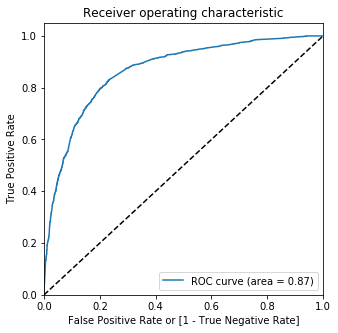

In [204]:
draw_roc(Y_train_pred_final2.Conversion, Y_train_pred_final2.Conv_Prob)

In [205]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final2[i]= Y_train_pred_final2.Conv_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final2.head()

,Conversion,Conv_Prob,Customer_id,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.275614,1871,27.561383,0,1,1,1,0,0,0,0,0,0,0
1,0,0.258929,6795,25.892874,0,1,1,1,0,0,0,0,0,0,0
2,0,0.320832,3516,32.083178,0,1,1,1,1,0,0,0,0,0,0
3,0,0.858016,8105,85.801560,1,1,1,1,1,1,1,1,1,1,0
4,0,0.205746,3934,20.574571,0,1,1,1,0,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final2.Conversion, Y_train_pred_final2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.565553  0.969992  0.316342
0.2   0.2  0.723098  0.911598  0.606947
0.3   0.3  0.791589  0.825223  0.770865
0.4   0.4  0.798856  0.759530  0.823088
0.5   0.5  0.800402  0.678832  0.875312
0.6   0.6  0.777675  0.551095  0.917291
0.7   0.7  0.762059  0.465937  0.944528
0.8   0.8  0.736858  0.366180  0.965267
0.9   0.9  0.684910  0.191403  0.989005


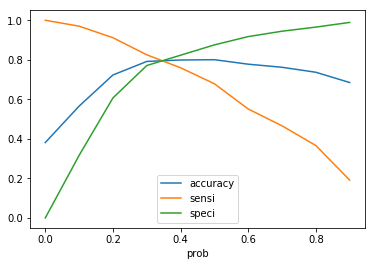

In [207]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [208]:
Y_train_pred_final2['final_predicted'] = Y_train_pred_final2.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)

Y_train_pred_final2.head()

,Conversion,Conv_Prob,Customer_id,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.275614,1871,27.561383,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.258929,6795,25.892874,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.320832,3516,32.083178,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.858016,8105,85.801560,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.205746,3934,20.574571,0,1,1,1,0,0,0,0,0,0,0,0


In [209]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final2.Conversion, Y_train_pred_final2.final_predicted)

0.7957637600494744

In [210]:
from sklearn.metrics import precision_score, recall_score

In [211]:
precision_score(Y_train_pred_final2.Conversion, Y_train_pred_final2.predicted)

0.7703635526921307

In [212]:
recall_score(Y_train_pred_final2.Conversion, Y_train_pred_final2.predicted)

0.6788321167883211

In [213]:
Y_train_pred_final2.Conversion, Y_train_pred_final2.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Conversion, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      1
 23      1
 24      1
 25     

### Precision Recall tradeoff

In [214]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(Y_train_pred_final2.Conversion, Y_train_pred_final2.Conv_Prob)

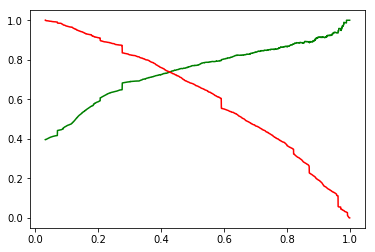

In [215]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the Test Set

#### Checking the Test sets
   - We had already scaled our data before, so our test sets are in a scaled state and hence we do not need to perform any scaling again

In [216]:
X_test.head()

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,lead_origin_Landing Page Submission,...,last_Notable_activity_Olark Chat Conversation,last_Notable_activity_Page Visited on Website,last_Notable_activity_Resubscribed to emails,last_Notable_activity_SMS Sent,last_Notable_activity_Unreachable,last_Notable_activity_Unsubscribed,last_Notable_activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.946533,0.954893,2.629607
2376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.713555,-0.889925,-1.098640
7766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.324000,-0.782265,1.231514
9199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.713555,-0.889925,-1.098640
4359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.713555,-0.889925,-1.098640


In [217]:
Y_test.head()

4269    1
2376    1
7766    1
9199    0
4359    1
Name: Converted, dtype: int64

- Retaining only the columns we got as best fits from our model built above

In [218]:
X_test_new = X_test[X_train_rfe_model2.drop(columns=['const'],axis=1).columns]

In [219]:
# Now let's use our model to make predictions.
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [220]:
X_test_new.shape

(2772, 15)

In [221]:
# Making predictions
Y_test_pred = lm2.predict(X_test_new)

In [222]:
Y_test_pred.head()

4269    0.794436
2376    0.962305
7766    0.356315
9199    0.069563
4359    0.870569
dtype: float64

## Model Evaluation

In [223]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(Y_test_pred)

In [224]:
# Let's see the head
y_pred_1.head()

,0
4269,0.794436
2376,0.962305
7766,0.356315
9199,0.069563
4359,0.870569


In [225]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)

In [226]:
# Putting CustID to index
y_test_df['Customer_id'] = y_test_df.index

In [227]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [228]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [229]:
y_pred_final.head()

,Converted,Customer_id,0
0,1,4269,0.794436
1,1,2376,0.962305
2,1,7766,0.356315
3,0,9199,0.069563
4,1,4359,0.870569


In [230]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [231]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Customer_id','Converted','Conv_Prob'], axis=1)

C:\Users\bagarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [232]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Customer_id,Converted,Conv_Prob
0,4269,1,0.794436
1,2376,1,0.962305
2,7766,1,0.356315
3,9199,0,0.069563
4,4359,1,0.870569


In [233]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [234]:
y_pred_final.head()

,Customer_id,Converted,Conv_Prob,final_predicted
0,4269,1,0.794436,1
1,2376,1,0.962305,1
2,7766,1,0.356315,1
3,9199,0,0.069563,0
4,4359,1,0.870569,1


In [235]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8023088023088023

In [236]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1345,  332],
       [ 216,  879]], dtype=int64)

In [237]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8027397260273973

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.8020274299344067

- So we see that the accuracy and the specificity of our model is over 80% which is what we need from our model

### Getting the final lead scores
- Lead score = Conversion probability * 100

In [240]:
Y_train_pred_final2[['Customer_id','Conv_Prob']].head()

final_leads = pd.concat([Y_train_pred_final2[['Customer_id','Conv_Prob']],y_pred_final[['Customer_id','Conv_Prob']]],axis=0)
final_leads['lead_score'] = final_leads.Conv_Prob.map(lambda x:x*100)
final_leads.head()

,Customer_id,Conv_Prob,lead_score
0,1871,0.275614,27.561383
1,6795,0.258929,25.892874
2,3516,0.320832,32.083178
3,8105,0.858016,85.801560
4,3934,0.205746,20.574571


In [241]:
final_data_with_lead_score = pd.merge(leads_df_cleaned,final_leads, left_on=leads_df_cleaned.index,right_on='Customer_id')
final_data_with_lead_score[['Prospect ID','Lead Number','lead_score']].head()


,Prospect ID,Lead Number,lead_score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,20.574571
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,33.853469
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,74.678867
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,14.094183
4,3256f628-e534-4826-9d63-4a8b88782852,660681,39.426613


### Conclusion
    - Getting the top Variables

In [242]:
#sort the parameters of the final model in descending order
lm2.params.sort_values(ascending = False)

lead_origin_Lead Add Form                        3.951625
lead_source_Welingak Website                     1.598101
last_activity_Had a Phone Conversation           1.516804
Total Time Spent on Website                      1.118646
lead_source_Olark Chat                           1.079307
const                                            0.283685
last_activity_Converted to Lead                 -0.914244
last_activity_Email Bounced                     -1.125857
last_activity_Olark Chat Conversation           -1.242664
last_Notable_activity_Email Opened              -1.333803
Do Not Email                                    -1.336774
last_Notable_activity_Olark Chat Conversation   -1.463693
last_Notable_activity_Page Visited on Website   -1.589781
last_Notable_activity_Modified                  -1.718242
last_Notable_activity_Email Link Clicked        -1.854570
dtype: float64

- As we see above, the top 3 variables are:
    - Lead origin
    - Lead Source
    - Last Activity

- Top 3 categorical/dummy variables 
    - lead_origin_Lead Add Form
    - lead_source_Welingak Website
    - last_activity_Had a Phone Conversation  